In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("EmployeeAttritionFPD.csv")   


In [3]:
df.head()

,Age,AgeGroup,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Sex,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,25-54,Travel_Rarely,1102,Human Resources Management,1.0,2.0,Human Resources Management,2.0,Female,94,3,2,Training and Development Officer,4,Single,5993,19479,8,1,11,3,1,8,0,1,6,4,0,5,1
1,49,25-54,Travel_Frequently,279,Information Technology,8.0,1.0,Information Technology,3.0,Male,61,2,2,Programmer,2,Single,5130,24907,1,0,23,4,4,10,3,3,10,7,1,7,0
2,37,25-54,Travel_Rarely,1373,Information Technology,2.0,2.0,Information Technology,4.0,Male,92,2,1,Programmer,3,Single,2090,2396,6,1,15,3,2,7,3,3,0,0,0,0,0
3,33,25-54,Travel_Frequently,1392,Information Technology,3.0,4.0,Information Technology,4.0,Male,56,3,1,Technical Support,3,Single,2909,23159,1,1,11,3,3,8,3,3,8,7,3,0,0
4,27,25-54,Travel_Rarely,591,Information Technology,2.0,1.0,Information Technology,1.0,Male,40,3,1,Technical Support,2,Single,3468,16632,9,0,12,3,4,6,3,3,2,2,2,2,0


In [4]:
df.shape

(1470, 31)

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   AgeGroup                  1470 non-null   str    
 2   BusinessTravel            1470 non-null   str    
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   str    
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   float64
 7   EducationField            1470 non-null   str    
 8   EnvironmentSatisfaction   1469 non-null   float64
 9   Sex                       1470 non-null   str    
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   str    
 14  JobSatisfaction    

In [6]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

EnvironmentSatisfaction    1
dtype: int64

In [7]:
df = df.dropna()


In [8]:
df.isna().sum().sum()


np.int64(0)

In [9]:
df.shape


(1469, 31)

In [10]:
df.duplicated().sum()


np.int64(0)

In [14]:
nominal_cols = [
    "Education",
    "EnvironmentSatisfaction",
    "JobInvolvement",
    "JobLevel",
    "JobSatisfaction",
    "PerformanceRating",
    "RelationshipSatisfaction",
    "WorkLifeBalance",
    "OverTime",
    "Attrition", # target
    "AgeGroup",
    "BusinessTravel",
    "Department",
    "EducationField",
    "Sex",
    "JobRole",
    "MaritalStatus",
    "MaritalStatus"
]

In [15]:
numerical_cols = [col for col in df.columns if col not in nominal_cols]

In [16]:
print("Nominal columns:", nominal_cols)
print("Numerical columns:", numerical_cols)

Nominal columns: ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'OverTime', 'Attrition', 'AgeGroup', 'BusinessTravel', 'Department', 'EducationField', 'Sex', 'JobRole', 'MaritalStatus', 'MaritalStatus']
Numerical columns: ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [17]:
target = "Attrition"  # change this
df[target].value_counts()


Attrition
0    1233
1     236
Name: count, dtype: int64

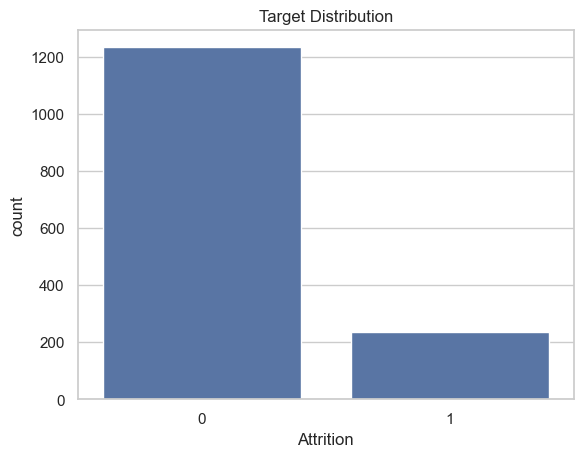

In [18]:
sns.countplot(x=target, data=df)
plt.title("Target Distribution")
plt.show()


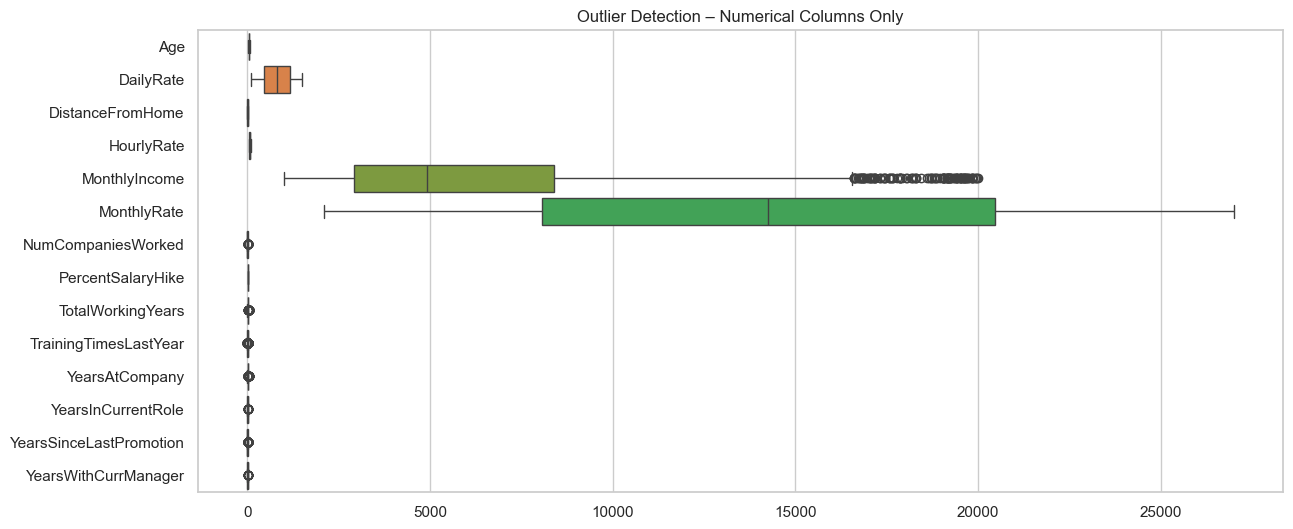

In [19]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[numerical_cols], orient="h")
plt.title("Outlier Detection – Numerical Columns Only")
plt.show()


In [20]:
outlier_results = []

for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    n_outliers = ((df[col] < lower) | (df[col] > upper)).sum()

    outlier_results.append({
        "column": col,
        "num_outliers": n_outliers,
        "outlier_pct": (n_outliers / len(df)) * 100,
        "lower_bound": lower,
        "upper_bound": upper
    })

outlier_df = pd.DataFrame(outlier_results).sort_values(
    "num_outliers", ascending=False
)

outlier_df


,column,num_outliers,outlier_pct,lower_bound,upper_bound
9,TrainingTimesLastYear,238,16.201498,0.5,4.5
4,MonthlyIncome,114,7.760381,-5292.5,16583.5
12,YearsSinceLastPromotion,107,7.283867,-4.5,7.5
10,YearsAtCompany,104,7.079646,-6.0,18.0
8,TotalWorkingYears,63,4.288632,-7.5,28.5
6,NumCompaniesWorked,52,3.539823,-3.5,8.5
11,YearsInCurrentRole,21,1.429544,-5.5,14.5
13,YearsWithCurrManager,14,0.953029,-5.5,14.5
5,MonthlyRate,0,0.000000,-10560.5,39075.5
1,DailyRate,0,0.000000,-573.0,2195.0


In [21]:
df.info()

<class 'pandas.DataFrame'>
Index: 1469 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1469 non-null   int64  
 1   AgeGroup                  1469 non-null   str    
 2   BusinessTravel            1469 non-null   str    
 3   DailyRate                 1469 non-null   int64  
 4   Department                1469 non-null   str    
 5   DistanceFromHome          1469 non-null   float64
 6   Education                 1469 non-null   float64
 7   EducationField            1469 non-null   str    
 8   EnvironmentSatisfaction   1469 non-null   float64
 9   Sex                       1469 non-null   str    
 10  HourlyRate                1469 non-null   int64  
 11  JobInvolvement            1469 non-null   int64  
 12  JobLevel                  1469 non-null   int64  
 13  JobRole                   1469 non-null   str    
 14  JobSatisfaction         